<a href="https://colab.research.google.com/github/arthurnovello/ECM514-Ciencia_dos_Dados/blob/master/atividade_heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Atividade Heart.csv

In [1]:
#Bibliotecas utilizadas para classificação e exportação da árvore gerada
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, \
                             GradientBoostingClassifier
#Biblioteca para facilitar a separação dos dataset em dados de traino e teste
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
#Pandas é uma biblioteca que facilita a ingestão e manipulação de dados
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)


#enabling to plot using plotlib in the notebook
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv(
    "/content/drive/My Drive/Colab Notebooks/ecm514_datasets/heart_.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,yes
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,yes
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,yes
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,yes
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,0,140,241,0,1,123,1,0.2,1,0,3,no
299,45,male,3,110,264,0,1,132,0,1.2,1,0,3,no
300,68,male,0,144,193,1,1,141,0,3.4,1,2,3,no
301,57,male,0,130,131,0,1,115,1,1.2,1,1,3,no


In [3]:
df['target'] = df['target'].map({'yes':0, 'no':1})
df['sex'] = df['sex'].map({'male':0, 'female':1})
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,0,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,0,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,1,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,0,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,1,0,120,354,0,1,163,1,0.6,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,1,0,140,241,0,1,123,1,0.2,1,0,3,1
299,45,0,3,110,264,0,1,132,0,1.2,1,0,3,1
300,68,0,0,144,193,1,1,141,0,3.4,1,2,3,1
301,57,0,0,130,131,0,1,115,1,1.2,1,1,3,1


# Todas as features

In [4]:
nomes_features = list(df.columns[:13])
nomes_features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [5]:
x = df[  nomes_features ]
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,0,3,145,233,1,0,150,0,2.3,0,0,1
1,37,0,2,130,250,0,1,187,0,3.5,0,0,2
2,41,1,1,130,204,0,0,172,0,1.4,2,0,2
3,56,0,1,120,236,0,1,178,0,0.8,2,0,2
4,57,1,0,120,354,0,1,163,1,0.6,2,0,2


In [6]:
y = df[  df.columns[13] ]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [7]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, 
                                                        random_state = 2556)
x_treino.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
198,62,0,0,120,267,0,1,99,1,1.8,1,2,3
34,51,0,3,125,213,0,0,125,1,1.4,2,1,2
202,58,0,0,150,270,0,0,111,1,0.8,2,0,3
33,54,0,2,125,273,0,0,152,0,0.5,0,1,2
92,52,0,2,138,223,0,1,169,0,0.0,2,4,2


# Decision Tree

In [8]:
#classificador
classificador = DecisionTreeClassifier()
#treinando o modelo
classificador.fit( x_treino, y_treino )

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
classificador.score( x_treino, y_treino)

1.0

In [10]:
classificador.score(x_teste, y_teste)

0.7582417582417582

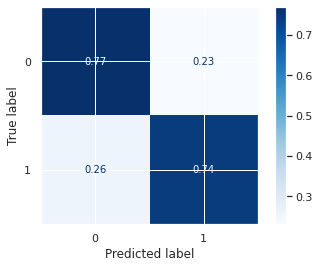

In [11]:
plot_confusion_matrix(estimator=classificador, X=x_teste, y_true=y_teste, 
                      display_labels=df['target'].unique(), cmap=plt.cm.Blues, 
                      normalize='true')

# Random Forest

In [12]:
#classificador
classificador = RandomForestClassifier()
#treinando o modelo
classificador.fit( x_treino, y_treino )

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
classificador.score( x_treino, y_treino)

1.0

In [14]:
classificador.score(x_teste, y_teste)

0.8571428571428571

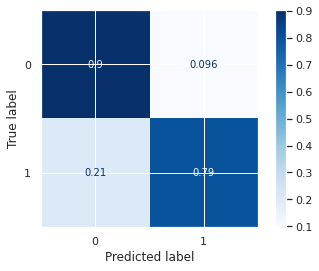

In [15]:
plot_confusion_matrix(estimator=classificador, X=x_teste, y_true=y_teste, 
                      display_labels=df['target'].unique(), cmap=plt.cm.Blues, 
                      normalize='true')

# Gradient Boost

In [16]:
#classificador
classificador = GradientBoostingClassifier()
#treinando o modelo
classificador.fit( x_treino, y_treino )

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [17]:
classificador.score( x_treino, y_treino)

1.0

In [18]:
classificador.score(x_teste, y_teste)

0.8131868131868132

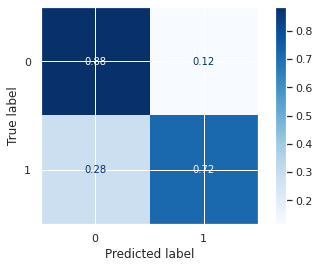

In [19]:
plot_confusion_matrix(estimator=classificador, X=x_teste, y_true=y_teste, 
                      display_labels=df['target'].unique(), cmap=plt.cm.Blues, 
                      normalize='true')

# Usando 5 Features



1.   age
2.   sex
3.   trestbps
4.   restecg
5.   thal



In [20]:
x2 = df[ ['age', 'sex', 'trestbps', 'restecg', 'thal'] ]
x2.head()

,age,sex,trestbps,restecg,thal
0,63,0,145,0,1
1,37,0,130,1,2
2,41,1,130,0,2
3,56,0,120,1,2
4,57,1,120,1,2


In [21]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x2, y, test_size = 0.3, 
                                                        random_state = 2556)
x_treino.head()

,age,sex,trestbps,restecg,thal
198,62,0,120,1,3
34,51,0,125,0,2
202,58,0,150,0,3
33,54,0,125,0,2
92,52,0,138,1,2


# Decision Tree

In [22]:
#classificador
classificador = DecisionTreeClassifier()
#treinando o modelo
classificador.fit( x_treino, y_treino )

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
classificador.score( x_treino, y_treino)

0.9952830188679245

In [24]:
classificador.score(x_teste, y_teste)

0.6813186813186813

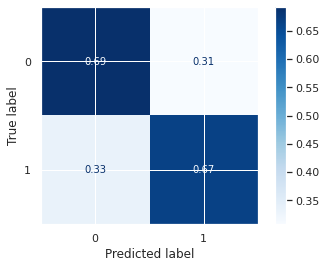

In [25]:
plot_confusion_matrix(estimator=classificador, X=x_teste, y_true=y_teste, 
                      display_labels=df['target'].unique(), cmap=plt.cm.Blues, 
                      normalize='true')

# Random Forest

In [26]:
#classificador
classificador = RandomForestClassifier()
#treinando o modelo
classificador.fit( x_treino, y_treino )

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
classificador.score( x_treino, y_treino)

0.9952830188679245

In [28]:
classificador.score(x_teste, y_teste)

0.7142857142857143

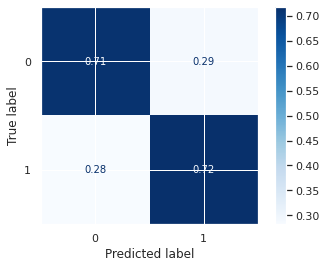

In [29]:
plot_confusion_matrix(estimator=classificador, X=x_teste, y_true=y_teste, 
                      display_labels=df['target'].unique(), cmap=plt.cm.Blues, 
                      normalize='true')

# Gradient Boost

In [30]:
#classificador
classificador = GradientBoostingClassifier()
#treinando o modelo
classificador.fit( x_treino, y_treino )

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [31]:
classificador.score( x_treino, y_treino)

0.9198113207547169

In [32]:
classificador.score(x_teste, y_teste)

0.6923076923076923

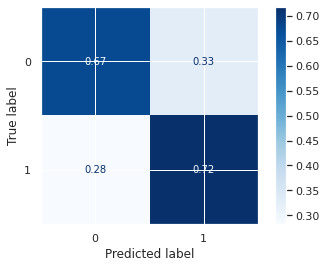

In [34]:
plot_confusion_matrix(estimator=classificador, X=x_teste, y_true=y_teste, 
                      display_labels=df['target'].unique(), cmap=plt.cm.Blues, 
                      normalize='true')

# Usando df.corr()


In [35]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,0.225439
sex,0.098447,1.000000,0.049353,0.056769,0.197912,-0.045032,0.058196,0.044020,-0.141664,-0.096093,0.030711,-0.118261,-0.210041,-0.280937
cp,-0.068653,0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,-0.433798
trestbps,0.279351,0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,0.144931
chol,0.213678,0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,0.085239
fbs,0.121308,-0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,0.028046
restecg,-0.116211,0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,-0.137230
thalach,-0.398522,0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,-0.421741
exang,0.096801,-0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,0.436757
oldpeak,0.210013,-0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,0.430696


In [36]:
x3 = df[ ['ca', 'thal', 'oldpeak', 'exang', 'cp'] ]
x3.head()

,ca,thal,oldpeak,exang,cp
0,0,1,2.3,0,3
1,0,2,3.5,0,2
2,0,2,1.4,0,1
3,0,2,0.8,0,1
4,0,2,0.6,1,0


In [37]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x3, y, test_size = 0.3, 
                                                        random_state = 2556)
x_treino.head()

,ca,thal,oldpeak,exang,cp
198,2,3,1.8,1,0
34,1,2,1.4,1,3
202,0,3,0.8,1,0
33,1,2,0.5,0,2
92,4,2,0.0,0,2


## Decision Tree

In [48]:
#classificador
classificador = DecisionTreeClassifier()
#treinando o modelo
classificador.fit( x_treino, y_treino )

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [49]:
classificador.score( x_treino, y_treino)

0.9669811320754716

In [50]:
classificador.score(x_teste, y_teste)

0.7252747252747253

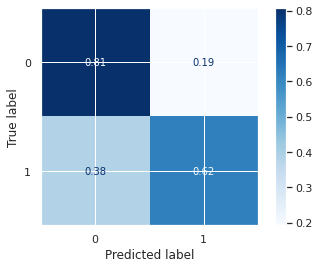

In [51]:
plot_confusion_matrix(estimator=classificador, X=x_teste, y_true=y_teste, 
                      display_labels=df['target'].unique(), cmap=plt.cm.Blues, 
                      normalize='true')

## Random Forest

In [52]:
#classificador
classificador = RandomForestClassifier()
#treinando o modelo
classificador.fit( x_treino, y_treino )

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
classificador.score( x_treino, y_treino)

0.9669811320754716

In [54]:
classificador.score(x_teste, y_teste)

0.7692307692307693

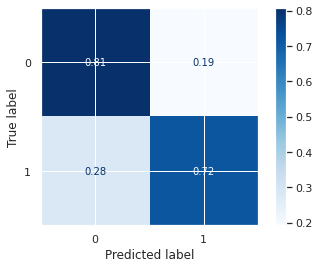

In [55]:
plot_confusion_matrix(estimator=classificador, X=x_teste, y_true=y_teste, 
                      display_labels=df['target'].unique(), cmap=plt.cm.Blues, 
                      normalize='true')

## Gradient Boosting

In [44]:
#classificador
classificador = GradientBoostingClassifier()
#treinando o modelo
classificador.fit( x_treino, y_treino )

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [45]:
classificador.score( x_treino, y_treino)

0.9528301886792453

In [46]:
classificador.score(x_teste, y_teste)

0.8131868131868132

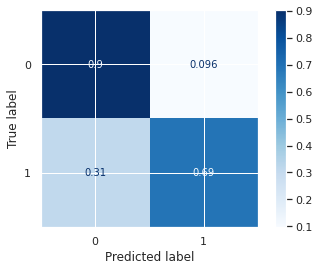

In [47]:
plot_confusion_matrix(estimator=classificador, X=x_teste, y_true=y_teste, 
                      display_labels=df['target'].unique(), cmap=plt.cm.Blues, 
                      normalize='true')